# Library Imports

In [58]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

# Goal

To determine whether an individual earns more than $50K based on a set of continuous and categorical variables.

# Data

## Census Income Dataset

For this exercises we're using the Census Income dataset available from the <a href='http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a>.

The full dataset has 48,842 entries. For this exercise we have reduced the number of records, fields and field entries, and have removed entries with null values. The file <strong>income.csv</strong> has	30,000 entries

Each entry contains the following information about an individual:
* <strong>age</strong>: the age of an individual as an integer from 18 to 90 (continuous)
* <strong>sex</strong>: Male or Female (categorical)
* <strong>education</strong>: represents the highest level of education achieved by an individual (categorical)
* <strong>education_num</strong>: represents education as an integer from 3 to 16 (categorical)
<div><table style="display: inline-block">
<tr><td>3</td><td>5th-6th</td><td>8</td><td>12th</td><td>13</td><td>Bachelors</td></tr>
<tr><td>4</td><td>7th-8th</td><td>9</td><td>HS-grad</td><td>14</td><td>Masters</td></tr>
<tr><td>5</td><td>9th</td><td>10</td><td>Some-college</td><td>15</td><td>Prof-school</td></tr>
<tr><td>6</td><td>10th</td><td>11</td><td>Assoc-voc</td><td>16</td><td>Doctorate</td></tr>
<tr><td>7</td><td>11th</td><td>12</td><td>Assoc-acdm</td></tr>
</table></div>
* <strong>marital-status</strong>: marital status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Married</td><td>Divorced</td><td>Married-spouse-absent</td></tr>
<tr><td>Separated</td><td>Widowed</td><td>Never-married</td></tr>
</table></div>
* <strong>workclass</strong>: a general term to represent the employment status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Local-gov</td><td>Private</td></tr>
<tr><td>State-gov</td><td>Self-emp</td></tr>
<tr><td>Federal-gov</td></tr>
</table></div>
* <strong>occupation</strong>: the general type of occupation of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Adm-clerical</td><td>Handlers-cleaners</td><td>Protective-serv</td></tr>
<tr><td>Craft-repair</td><td>Machine-op-inspct</td><td>Sales</td></tr>
<tr><td>Exec-managerial</td><td>Other-service</td><td>Tech-support</td></tr>
<tr><td>Farming-fishing</td><td>Prof-specialty</td><td>Transport-moving</td></tr>
</table></div>
* <strong>hours-per-week</strong>: the hours an individual has reported to work per week as an integer from 20 to 90 (continuous)
* <strong>income</strong>: whether or not an individual makes more than \\$50,000 annually (label)
* <strong>label</strong>: income represented as an integer (0: <=\\$50K, 1: >\\$50K) (optional label)

In [30]:
df = pd.read_csv('../Data/income.csv')
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [31]:
df.describe(include='all')

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
count,30000.000000,30000,30000,30000.000000,30000,30000,30000,30000.000000,30000,30000.000000
unique,NaN,2,14,NaN,6,5,12,NaN,2,NaN
top,NaN,Male,HS-grad,NaN,Married,Private,Exec-managerial,NaN,<=50K,NaN
freq,NaN,19671,9610,NaN,12390,22725,4227,NaN,21700,NaN
mean,37.144100,NaN,NaN,10.280133,NaN,NaN,NaN,41.384033,NaN,0.276667
std,12.856173,NaN,NaN,2.479556,NaN,NaN,NaN,9.684555,NaN,0.447358
min,18.000000,NaN,NaN,3.000000,NaN,NaN,NaN,20.000000,NaN,0.000000
25%,26.000000,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN,0.000000
50%,36.000000,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN,0.000000
75%,46.000000,NaN,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30000 non-null  int64 
 1   sex             30000 non-null  object
 2   education       30000 non-null  object
 3   education-num   30000 non-null  int64 
 4   marital-status  30000 non-null  object
 5   workclass       30000 non-null  object
 6   occupation      30000 non-null  object
 7   hours-per-week  30000 non-null  int64 
 8   income          30000 non-null  object
 9   label           30000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


# Creating the model

## Separate continous, categorical, and label column names

In [33]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [34]:
cont_cols = ['age','hours-per-week']
cat_cols = ['sex','education','marital-status','workclass', 'occupation']
y_col = ['label']

## Convert categorical columns to category dtypes

In [35]:
for c in cat_cols:
    df[c] = df[c].astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30000 non-null  int64   
 1   sex             30000 non-null  category
 2   education       30000 non-null  category
 3   education-num   30000 non-null  int64   
 4   marital-status  30000 non-null  category
 5   workclass       30000 non-null  category
 6   occupation      30000 non-null  category
 7   hours-per-week  30000 non-null  int64   
 8   income          30000 non-null  object  
 9   label           30000 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 1.3+ MB


## Shuffle dataset

In [37]:
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,23,Female,HS-grad,9,Never-married,Private,Other-service,50,<=50K,0
1,37,Female,Prof-school,15,Married,State-gov,Prof-specialty,39,>50K,1
2,34,Male,Some-college,10,Divorced,Private,Adm-clerical,40,<=50K,0
3,31,Male,HS-grad,9,Married,Private,Craft-repair,40,>50K,1
4,20,Female,Some-college,10,Never-married,Private,Sales,25,<=50K,0


## Set embedding sizes

Embedding sizes rule of thumb: half of the number of categories but not to exceed 50.

In [38]:
cat_szs = [len(df[c].cat.categories) for c in cat_cols]
emb_szs = [(c,min(50,(c+1)//2)) for c in cat_szs]
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

## Create an array of categorical values

In [39]:
cats = np.stack([df[c].cat.codes.values for c in cat_cols],axis=1)
cats.shape

(30000, 5)

## Convert categorical numpy array to a tensor

In [40]:
cats = torch.tensor(cats, dtype=torch.int64)

## Create array of continous values

In [41]:
conts = np.stack([df[c].values for c in cont_cols],axis=1)
conts.shape

(30000, 2)

## Convert continous numpy array to a tensor

In [42]:
conts = torch.tensor(conts,dtype=torch.float)

In [43]:
conts.dtype

torch.float32

## Create a label tensor

In [44]:
y = torch.tensor(df[y_col].values.flatten(),dtype=torch.long)

In [45]:
y.dtype

torch.int64

## Create train and test sets from `cats`, `conts`, and `y`

In [47]:
data_sz = 30000
test_sz = 5000

cat_train = cats[:data_sz-test_sz]
cat_test = cats[data_sz-test_sz:]
con_train = conts[:data_sz-test_sz]
con_test = conts[data_sz-test_sz:]
y_train = y[:data_sz-test_sz]
y_test = y[data_sz-test_sz:]

## Define the model class

In [49]:
class TabularModel(nn.Module):
    '''
    - emb_szs: list of tuples: list of categorical variables sizes paired with their embedding sizes
    - n_cont: int: number of continous variables
    - out_sz: int: output size
    - layers: list of int: list of layer sizes
    - p: list of float: dropout probability for each layer
    '''
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        
        # Instanciate nn.Module
        super().__init__()
        
        # Create the embedings ModuleList, dropout, and batch normalisation functions
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont) # Normalising continuous features to make sure they are in the same scale
        
        # Create the initial and hidden layers of the model
        layerlist = []
        n_emb = sum([nf for ni,nf in emb_szs])
        # Total number of in features to the neural network
        n_in = n_emb + n_cont
        
        for n,i in enumerate(layers):
            layerlist.append(nn.Linear(n_in, i))    # Apply a linear transformatino for incomming data
            layerlist.append(nn.ReLU(inplace=True)) # Apply ReLU to the data
            layerlist.append(nn.BatchNorm1d(i))     # Normalise data
            layerlist.append(nn.Dropout(p))         # Dropout nodes
            n_in = i # This parameter will set the n_in for the next layer based on the size of the existing layer
        
        # Create an output layer
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        # Create a sequential container for the layers
        self.layers = nn.Sequential(*layerlist)
            
        
    def forward(self, x_cat, x_cont):
        # Initiate a list of embedding tensors
        embeddings = []
                
        # Append to the embeddings list the embeddings for all categorical variables
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
            
        # Concatenate the embedings on a row basis and apply dropout
        x = torch.cat(embeddings,1)
            
        x = self.emb_drop(x)

        # Apply batch normalisation to continuous variables
        x_cont = self.bn_cont(x_cont)

        # Concatenate continuous and categorical variables
        x = torch.cat([x,x_cont], 1)

        # Output of all layers
        x = self.layers(x)
        return x

## Initialise the model

In [ ]:
torch.manual_seed(33)

In [52]:
model = TabularModel(emb_szs=emb_szs, n_cont=conts.shape[1], out_sz=2, layers=[50])
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

## Define loss and optimisation functions

In [54]:
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

# Training

In [59]:
training_time = time.time()

epochs = 100
losses = []

dataset_train = TensorDataset(cat_train, con_train, y_train)
data_loader = DataLoader(dataset_train,batch_size=1000,num_workers=1)

for i in range(epochs):
    i+=1
    
    batch_losses = []
    # For each epoch, for each dataset in the data loader
    for cat_train, con_train, y_train in data_loader:
        y_pred = model(cat_train, con_train)
        loss = criterion(y_pred, y_train) # Removed torch.sqrt(...)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%5 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - training_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.39769632
epoch:   6  loss: 0.31165224
epoch:  11  loss: 0.30145156
epoch:  16  loss: 0.30972096
epoch:  21  loss: 0.28124899
epoch:  26  loss: 0.27982074
epoch:  31  loss: 0.30416650
epoch:  36  loss: 0.27706313
epoch:  41  loss: 0.29380837
epoch:  46  loss: 0.27378523
epoch:  51  loss: 0.27221528
epoch:  56  loss: 0.29635167
epoch:  61  loss: 0.27960637
epoch:  66  loss: 0.29063520
epoch:  71  loss: 0.27957687
epoch:  76  loss: 0.27300629
epoch:  81  loss: 0.27025038
epoch:  86  loss: 0.27360958
epoch:  91  loss: 0.28087631
epoch:  96  loss: 0.26956752
epoch: 100  loss: 0.27492979

Duration: 181 seconds


## Plot the loss

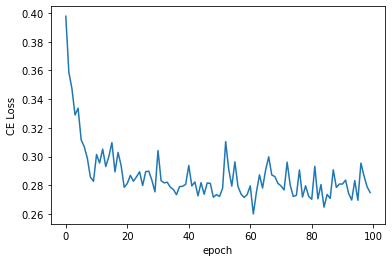

In [60]:
plt.plot(range(epochs), [l.item() for l in losses])
plt.ylabel('CE Loss')
plt.xlabel('epoch');

# Testing and evaluation

## Testing

In [61]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)

## Evaluation

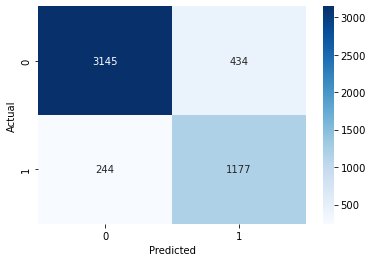

In [62]:
predictions = y_val.argmax(dim=1)
cm = confusion_matrix(y_test,predictions)

cm_plot = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
cm_plot.set(xlabel='Predicted',ylabel='Actual');

In [63]:
a = cm[np.diag_indices_from(cm)].sum()/cm.sum()

print(f'Accuracy = {a*100:.2f}%')

Accuracy = 86.44%


# New Data

In [67]:
def test_data(mdl): # pass in the name of the model
    # INPUT NEW DATA
    age = float(input("What is the person's age? (18-90)  "))
    sex = input("What is the person's sex? (Male/Female) ").capitalize()
    edn = int(input("What is the person's education level? (3-16) "))
    mar = input("What is the person's marital status? ").capitalize()
    wrk = input("What is the person's workclass? ").capitalize()
    occ = input("What is the person's occupation? ").capitalize()
    hrs = float(input("How many hours/week are worked? (20-90)  "))

    # PREPROCESS THE DATA
    sex_d = {'Female':0, 'Male':1}
    mar_d = {'Divorced':0, 'Married':1, 'Married-spouse-absent':2, 'Never-married':3, 'Separated':4, 'Widowed':5}
    wrk_d = {'Federal-gov':0, 'Local-gov':1, 'Private':2, 'Self-emp':3, 'State-gov':4}
    occ_d = {'Adm-clerical':0, 'Craft-repair':1, 'Exec-managerial':2, 'Farming-fishing':3, 'Handlers-cleaners':4,
            'Machine-op-inspct':5, 'Other-service':6, 'Prof-specialty':7, 'Protective-serv':8, 'Sales':9, 
            'Tech-support':10, 'Transport-moving':11}

    sex = sex_d[sex]
    mar = mar_d[mar]
    wrk = wrk_d[wrk]
    occ = occ_d[occ]

    # CREATE CAT AND CONT TENSORS
    cats = torch.tensor([sex,edn,mar,wrk,occ], dtype=torch.int64).reshape(1,-1)
    conts = torch.tensor([age,hrs], dtype=torch.float).reshape(1,-1)
    
    # SET MODEL TO EVAL (in case this hasn't been done)
    mdl.eval()

    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(cats, conts).argmax().item()

    print(f'\nThe predicted label is {z}')
    
test_data(model)

What is the person's age? (18-90)   33
What is the person's sex? (Male/Female)  Male
What is the person's education level? (3-16)  13
What is the person's marital status?  Married
What is the person's workclass?  Private
What is the person's occupation?  Exec-managerial
How many hours/week are worked? (20-90)   38



The predicted label is 1
